In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("ANZ%20synthesised%20transaction%20dataset.xlsx; filename%2A.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# Modifying data to obtain salaries for each customer

df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [4]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [5]:
df_cust = df.groupby("customer_id").mean()
df_cust.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


#### Correlation

In [24]:
corr = df.corr(method='pearson')
corr

,card_present_flag,merchant_code,balance,age,amount,annual_salary
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074,-0.003895
merchant_code,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178,0.258148
age,-0.008405,NaN,0.199329,1.000000,0.029980,-0.083823
amount,-0.002074,NaN,0.059178,0.029980,1.000000,0.056421
annual_salary,-0.003895,NaN,0.258148,-0.083823,0.056421,1.000000


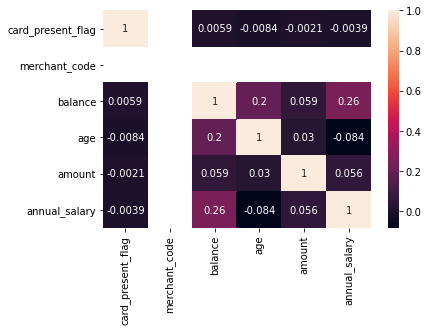

In [26]:
sns.heatmap(corr, annot=True)

 Drop the merchant code as it doesnot add any value to the correlation table and correlate the remaining features  

### Predictive analysis

Linear Regression

In [9]:
x = df_cust.drop("annual_salary", axis=1)
y = df_cust["annual_salary"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
reg.score(X_train, y_train)

0.13583078062235598

In [13]:
reg.score(X_test, y_test)

0.00809884278204287

In [14]:
reg.predict(X_test)[:5]

array([3344.44587756, 2062.50533216, 2363.86292699, 1689.1897909 ,
       2219.02367678])

Decision Tree
    - Classification

In [15]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]
pd.get_dummies(df_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [16]:
x = pd.get_dummies(df_cat)
y = df["annual_salary"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
decision_tree_class = DecisionTreeClassifier()


In [18]:
decision_tree_class.fit(X_train, y_train)
decision_tree_class.score(X_train, y_train)

0.7881461490554287

In [19]:
decision_tree_class.score(X_test,y_test)

0.7600664176006642

    - Regression

In [20]:
decision_tree_reg = DecisionTreeRegressor()

In [21]:
decision_tree_reg.fit(X_train, y_train)
decision_tree_reg.score(X_train, y_train)

0.7460256620065332

In [22]:
decision_tree_reg.score(X_test, y_test)

0.6972382421619358